In [1]:
"""
@author: WISAM WAEEL SHAMOON :)

"""

import torch 
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn

# Import Non-PyTorch Modules will be used in the lab

import time
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image
import random
import numpy as np
import os.path

####################################################################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
####################################################################################

#  CSV files

train_csv_file = r'/content/sample_data/training_labels.csv'
validation_csv_file = '/content/sample_data/validation_labels.csv'
#test_csv_file = 'test_labels.csv'


# Absolute path for finding the directory contains image datasets

train_data_dir = r"/content/sample_data/train" 
validation_data_dir = r'/content/sample_data/validation'
#test_data_dir =  r'C:/Users/The creater(1)/Desktop\test_data_pytorch'

####################################################################################
####################################################################################

# Create Dateaset Class

class Dataset(Dataset):
    
    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.data_name = pd.read_csv(csv_file)
        self.len = self.data_name.shape[0] 
        
    # Get Length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 2])
        image = Image.open(img_name)
        y = self.data_name.iloc[idx, 3]
        if self.transform:
            image = self.transform(image)
        return image, y
    
####################################################################################
####################################################################################



In [2]:
print(device)

cuda


In [3]:
# the model 

model = models.resnet18(pretrained=True)
model= model.to(device)

for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Linear(512, 7)
model.to(device)
#print(model)

optimizer = torch.optim.Adam([parameters for parameters in model.parameters() if parameters.requires_grad], lr = 0.003)


####################################################################################
####################################################################################


mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]


composed = transforms.Compose([
    
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    #transforms.ToPILImage(),

    ])


# Create the train dataset and validation dataset

train_dataset = Dataset(transform=composed, csv_file=train_csv_file
                        ,data_dir=train_data_dir)


validation_dataset = Dataset(transform=composed, csv_file=validation_csv_file
                          ,data_dir=validation_data_dir)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [4]:

# test the data images
"""
image = train_dataset[29][0]
plt.imshow(image)
plt.show()
"""

####################################################################################
####################################################################################

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=15)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=15)

criterion = nn.CrossEntropyLoss()


In [5]:

N_EPOCHS = 100
loss_list = []
accuracy_list = []
correct = 0
n_test = len(validation_dataset)

for epoch in range(N_EPOCHS):
    loss_sublist = []
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        model.train()
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
    loss_list.append(np.mean(loss_sublist))
    correct = 0

# Type your code here

# Step 6: Plot the accuracy for valdiation dataset

    for x_test, y_test in validation_loader:
        x_test = x_test.to(device)
        y_test = y_test.to(device)
        model.eval()
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct/n_test
    accuracy_list.append(accuracy)
  
####################################################################################
####################################################################################

# ploting 



print("accuracy_list", accuracy_list)
print("loss_list", loss_list)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


accuracy_list [0.07142857142857142, 0.2, 0.14285714285714285, 0.3, 0.5571428571428572, 0.7, 0.5857142857142857, 0.5, 0.7, 0.8142857142857143, 0.8428571428571429, 0.8142857142857143, 0.8428571428571429, 0.8571428571428571, 0.9, 0.9, 0.9, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9428571428571428, 0.9571428571428572, 0.9571428571428572, 0.9714285714285714, 0.9714285714285714, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.985714

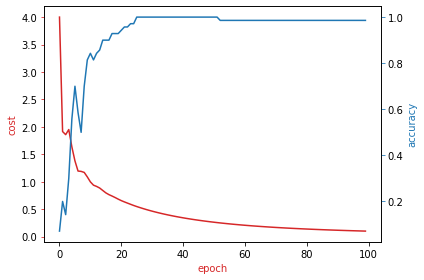

In [6]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('cost', color=color) 
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'

ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()   

In [7]:
correct = 0
accuracy = 0
N = len(validation_dataset)
for x_test, y_test in validation_loader:
    x_test = x_test.to(device)
    y_test = y_test.to(device)
    model.eval()
    z = model(x_test)
    _, yhat = torch.max(z.data, 1)
    correct += (yhat == y_test).sum().item()
accuracy = correct / N
print("Accuracy using ResNet18: ", accuracy*100, " %")

Accuracy using ResNet18:  98.57142857142858  %


In [8]:
random.seed(0)
numbers = random.sample(range(70), 5)


count = 0 
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    x=x.to(device)
    y=y.to(device)
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        plt.show()
        print("yhat:  ", yhat)
        count += 1
    if count >= 5:
        break 

yhat:   tensor([6], device='cuda:0')


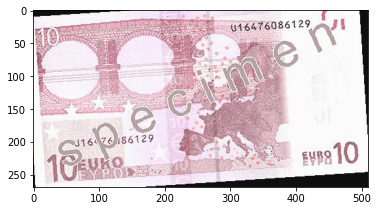

tensor([[-13.6644,   6.0040, -11.6531,  -3.5664,  -4.9728,  -2.8914,   1.6055]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [13]:
model.eval()
from torch.autograd import Variable
test_dir = "/content/sample_data/validation/18.jpeg"

def image_loader(image_name):
    image = Image.open(image_name)
    plt.imshow(image)
    plt.show()
    image = composed(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
#model(image)
  #  print(y)
    return image.to(device)

# return image.cuda() #assumes that you’re using GPU
#function call ....
image = image_loader(test_dir)

"""for i in range(1):
    # An instance of your model.
    img_pil = Image.open(test_dir)
    img_pil.show()
    img_tensor = composed(img_pil).float()
    img_tensor = img_tensor.unsqueeze_(0)

    z = model(Variable(img_tensor))

    output = z.detach().numpy()
    output2 = output.argmax()
    print(output2)"""
#print(image.shape)
model(image)

start prediction


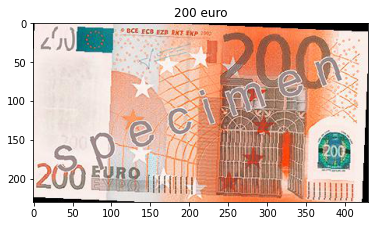

In [32]:
model.eval()
from torch.autograd import Variable
test_dir = "/content/sample_data/validation/51.jpeg"

def image_loader(image_name):
    image = Image.open(image_name)
    plt.imshow(image)
    image = composed(image).float()
    image = Variable(image, requires_grad=True)
    image=image.to(device)
    image = image.unsqueeze(0)
    z = model(image)
    index = z.data.cpu().numpy().argmax()
    if index == 0:
      q = "5 euro"
    elif index == 1:
      q = "10 euro"
    elif index == 2:
      q = "20 euro "
    elif index == 3:
      q = "50 euro"
    elif index == 4:
      q = "100 euro"
    elif index == 5:
      q ="200 euro"
    elif index == 6:
      q = "500 euro"
    plt.title(q)
    plt.show()
    return index

# return image.cuda() #assumes that you’re using GPU
#function call ....
image = image_loader(test_dir)
